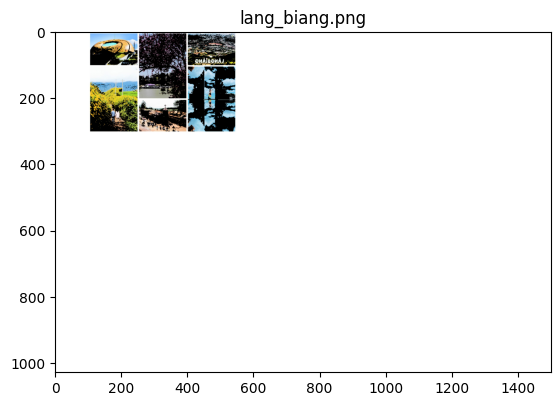

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('dalat.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_otsu = cv2.bitwise_and(img, img, mask=mask)
img_flip = cv2.flip(img_otsu, 1)
h, w = img_flip.shape[:2]
img_resized = cv2.resize(img_flip, (int(w*0.3), int(h*0.3)))
canvas = np.ones_like(img) * 255
h_r, w_r = img_resized.shape[:2]
x_offset = min(100, canvas.shape[1] - w_r)
canvas[0:h_r, x_offset:x_offset+w_r] = img_resized
cv2.imwrite('lang_biang.png', canvas)
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.title('lang_biang.png')
plt.show()

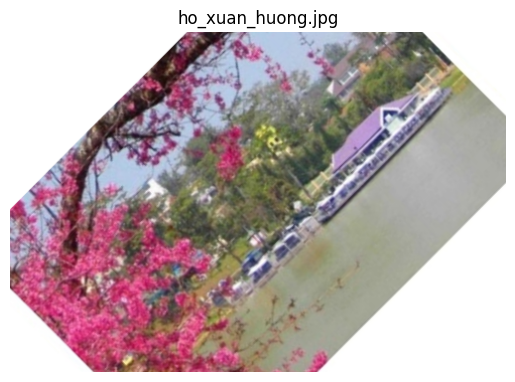

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dalat.jpg')

h, w = img.shape[:2]
x1, y1 = w//3, h//3
x2, y2 = x1 + w//3, y1 + h//3
roi = img[y1:y2, x1:x2]
center = (roi.shape[1]//2, roi.shape[0]//2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(roi, M, (roi.shape[1], roi.shape[0]), borderValue=(255,255,255))
cv2.imwrite('ho_xuan_huong.jpg', rotated)

plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('ho_xuan_huong.jpg')
plt.axis('off')
plt.show()

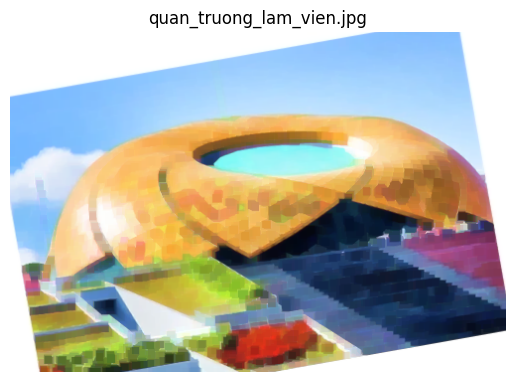

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dalat.jpg')
h, w = img.shape[:2]
x1, y1 = 2*w//3, 0
x2, y2 = w, h//3
roi = img[y1:y2, x1:x2]
center = (roi.shape[1]//2, roi.shape[0]//2)
M = cv2.getRotationMatrix2D(center, 10, 1.0)
mapped = cv2.warpAffine(roi, M, (roi.shape[1], roi.shape[0]), borderValue=(255,255,255))
kernel = np.ones((7,7), np.uint8)
closed = np.zeros_like(mapped)
for c in range(3):
    closed[:,:,c] = cv2.morphologyEx(mapped[:,:,c], cv2.MORPH_CLOSE, kernel)
cv2.imwrite('quan_truong_lam_vien.jpg', closed)
plt.imshow(cv2.cvtColor(closed, cv2.COLOR_BGR2RGB))
plt.title('quan_truong_lam_vien.jpg')
plt.axis('off')
plt.show()

Menu:
1. geometric_transformation
   1.1 coordinate_mapping
   1.2 Rotate
   1.3 Scale
   1.4 Shift
2. segment
   2.1 Adaptive_thresholding
   2.2 Binary_dilation
   2.3 Binary_erosion
   2.4 Otsu
Bạn có thể nhập 1 chức năng (vd: 1.2) hoặc kết hợp 2 chức năng (vd: 1.2 2.4)


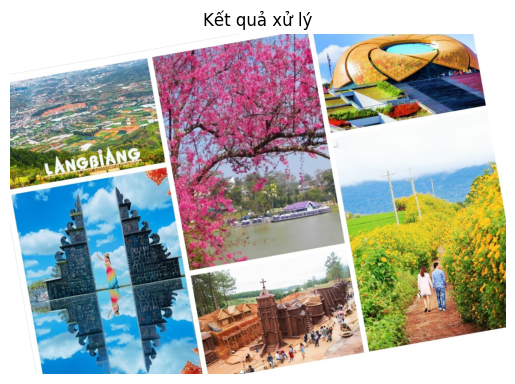

Đã lưu kết quả vào output.jpg


In [16]:
import cv2
import numpy as np

def coordinate_mapping(img):
    h, w = img.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, 10, 1.0)
    return cv2.warpAffine(img, M, (w, h), borderValue=(255,255,255))

def rotate(img, angle=45):
    h, w = img.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, (w, h), borderValue=(255,255,255))

def scale(img, fx=0.5, fy=0.5):
    return cv2.resize(img, (0,0), fx=fx, fy=fy)

def shift(img, dx=50, dy=50):
    h, w = img.shape[:2]
    M = np.float32([[1,0,dx],[0,1,dy]])
    return cv2.warpAffine(img, M, (w, h), borderValue=(255,255,255))

def adaptive_thresholding(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

def binary_dilation(img):
    kernel = np.ones((5,5), np.uint8)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.dilate(img, kernel, iterations=1)

def binary_erosion(img):
    kernel = np.ones((5,5), np.uint8)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.erode(img, kernel, iterations=1)

def otsu(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return mask

print("Menu:")
print("1. geometric_transformation")
print("   1.1 coordinate_mapping")
print("   1.2 Rotate")
print("   1.3 Scale")
print("   1.4 Shift")
print("2. segment")
print("   2.1 Adaptive_thresholding")
print("   2.2 Binary_dilation")
print("   2.3 Binary_erosion")
print("   2.4 Otsu")
print("Bạn có thể nhập 1 chức năng (vd: 1.2) hoặc kết hợp 2 chức năng (vd: 1.2 2.4)")

choices = input("Nhập lựa chọn: ").split()
img = cv2.imread('dalat.jpg')
result = img.copy()

if choices[0].startswith('1.'):
    if choices[0] == '1.1':
        result = coordinate_mapping(result)
    elif choices[0] == '1.2':
        result = rotate(result)
    elif choices[0] == '1.3':
        result = scale(result)
    elif choices[0] == '1.4':
        result = shift(result)

cv2.imwrite('ketqua.jpg', result)
if len(result.shape) == 2:
    import matplotlib.pyplot as plt
    plt.imshow(result, cmap='gray')
else:
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Kết quả xử lý')
plt.axis('off')
plt.show()
print("Đã lưu kết quả vào output.jpg")